In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [4]:
df.shape

(13490604, 7)

In [5]:
df[['borough', 'major_category']].value_counts()

borough         major_category           
Croydon         Theft and Handling           176256
Barnet          Theft and Handling           171180
Ealing          Theft and Handling           160812
Bromley         Theft and Handling           156492
Lambeth         Theft and Handling           150552
                                              ...  
City of London  Criminal Damage                1188
                Drugs                           756
                Robbery                         540
                Burglary                        540
                Other Notifiable Offences       432
Length: 295, dtype: int64

In [6]:
# Filter crime yang terjadi di wilayah Redbridge pada tahun 2015

df_rb = df[(df['borough'] == 'Redbridge') & (df['year'] == 2015) & (df['value'] > 0)]
df_rb.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
215,E01003790,Redbridge,Violence Against the Person,Assault with Injury,2,2015,12
2148,E01003674,Redbridge,Violence Against the Person,Harassment,3,2015,12
2630,E01003769,Redbridge,Violence Against the Person,Wounding/GBH,1,2015,8
7179,E01003778,Redbridge,Theft and Handling,Theft From Motor Vehicle,1,2015,3
8451,E01003741,Redbridge,Violence Against the Person,Common Assault,1,2015,3


In [7]:
df_rb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11382 entries, 215 to 13486721
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   lsoa_code       11382 non-null  object
 1   borough         11382 non-null  object
 2   major_category  11382 non-null  object
 3   minor_category  11382 non-null  object
 4   value           11382 non-null  int64 
 5   year            11382 non-null  int64 
 6   month           11382 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 711.4+ KB


In [8]:
df_rb.shape

(11382, 7)

In [9]:
df_rb.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [10]:
df_rb['major_category'].value_counts()

Theft and Handling             3631
Violence Against the Person    3491
Burglary                       1412
Criminal Damage                1283
Drugs                           767
Robbery                         464
Other Notifiable Offences       334
Name: major_category, dtype: int64

In [11]:
df_rb['major_category'].unique()

array(['Violence Against the Person', 'Theft and Handling', 'Burglary',
       'Criminal Damage', 'Robbery', 'Drugs', 'Other Notifiable Offences'],
      dtype=object)

In [12]:
list_vlc = []
list_brg = []
list_th = []
list_dmg = []
list_drg = []
list_rob = []
list_other = []

for i in df_rb['major_category'].unique():
    for j in range(1, 13):
        if i == 'Violence Against the Person':
            list_vlc.append(df_rb[(df_rb['major_category'] == i) & (df_rb['month'] == j)]['value'].sum())
        if i == 'Burglary':
            list_brg.append(df_rb[(df_rb['major_category'] == i) & (df_rb['month'] == j)]['value'].sum())
        if i == 'Theft and Handling':
            list_th.append(df_rb[(df_rb['major_category'] == i) & (df_rb['month'] == j)]['value'].sum())
        if i == 'Criminal Damage':
            list_dmg.append(df_rb[(df_rb['major_category'] == i) & (df_rb['month'] == j)]['value'].sum())
        if i == 'Drugs':
            list_drg.append(df_rb[(df_rb['major_category'] == i) & (df_rb['month'] == j)]['value'].sum())
        if i == 'Robbery':
            list_rob.append(df_rb[(df_rb['major_category'] == i) & (df_rb['month'] == j)]['value'].sum())
        if i == 'Other Notifiable Offences':
            list_other.append(df_rb[(df_rb['major_category'] == i) & (df_rb['month'] == j)]['value'].sum())

print(list_brg)
print(list_dmg)
print(list_drg)
print(list_other)
print(list_rob)
print(list_th)
print(list_vlc)

[251, 252, 202, 177, 155, 166, 147, 130, 167, 168, 205, 225]
[122, 115, 157, 132, 118, 140, 156, 113, 129, 153, 142, 150]
[127, 106, 100, 87, 98, 110, 99, 103, 123, 100, 99, 120]
[31, 38, 35, 42, 26, 33, 36, 28, 42, 25, 30, 31]
[59, 37, 58, 49, 46, 67, 52, 52, 70, 68, 46, 53]
[578, 514, 597, 557, 552, 597, 563, 532, 511, 601, 635, 569]
[413, 407, 499, 429, 465, 589, 550, 472, 484, 529, 532, 524]


In [13]:
df_redb = pd.DataFrame({"Violence Against the Person": list_vlc,
                        "Theft and Handling": list_th,
                        "Burglary": list_brg,
                        "Criminal Damage": list_dmg,
                        "Robbery": list_rob,
                        "Drugs": list_drg,
                        "Other Notifiable Offences": list_other
                  }, index=range(1, 13))

df_redb

,Violence Against the Person,Theft and Handling,Burglary,Criminal Damage,Robbery,Drugs,Other Notifiable Offences
1,413,578,251,122,59,127,31
2,407,514,252,115,37,106,38
3,499,597,202,157,58,100,35
4,429,557,177,132,49,87,42
5,465,552,155,118,46,98,26
6,589,597,166,140,67,110,33
7,550,563,147,156,52,99,36
8,472,532,130,113,52,103,28
9,484,511,167,129,70,123,42
10,529,601,168,153,68,100,25


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

---
# A. Area Plot

**Create Visualization**

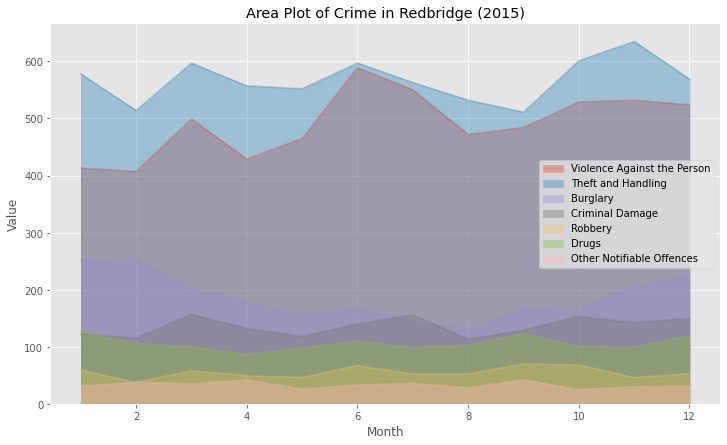

In [15]:
df_redb.plot(kind='area',
             stacked=False,
             alpha=0.4,
             figsize=(12, 7)
            )

plt.title('Area Plot of Crime in Redbridge (2015)')
plt.ylabel('Value')
plt.xlabel('Month')

plt.show()

**Conclusion**

~~~
Crime yang paling sering terjadi setiap bulan di wilayah redbrige pada tahun 2015 adalah Theft and Handling
~~~

---
# B. Histogram

**Create Visualization**

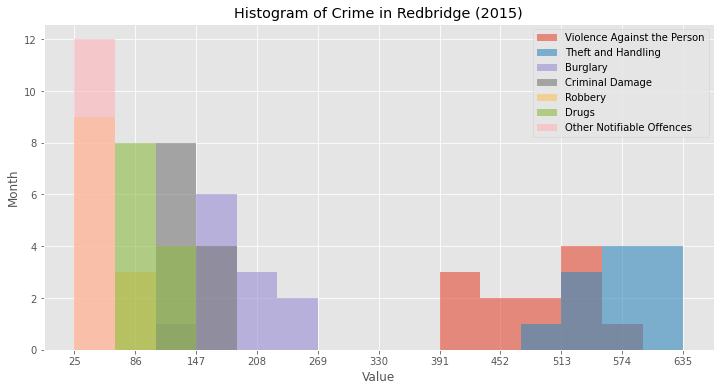

In [16]:
count, bin_edges = np.histogram(df_redb)

df_redb.plot(kind='hist',
             figsize=(12, 6),
             bins=15,
             alpha=0.6,
             stacked=False,
             xticks=bin_edges
            )

plt.title('Histogram of Crime in Redbridge (2015)')
plt.ylabel('Month')
plt.xlabel('Value')

plt.show()

**Conclusion**
~~~
Pada plot di atas, sumbu x menunjukkan kisaran value/jumlah crime dalam interval 25-635. Sumbu y mewakili waktu dalam satuan month/bulan.
~~~

---
# C. Bar Charts

**Create Visualization**

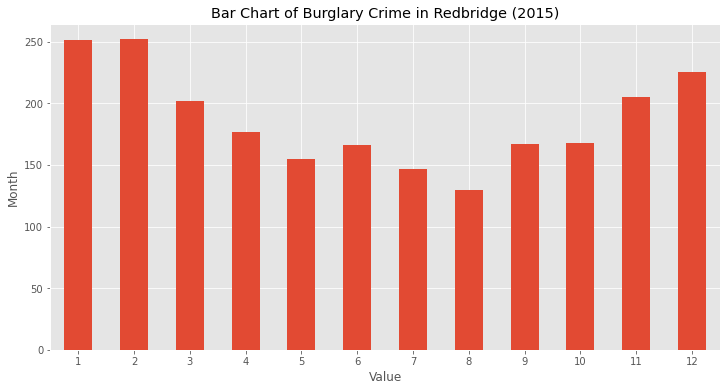

In [17]:
df_redb['Burglary'].plot(kind='bar',
             figsize=(12, 6),
            )

plt.title('Bar Chart of Burglary Crime in Redbridge (2015)')
plt.ylabel('Month')
plt.xlabel('Value')
plt.xticks(rotation='horizontal')

plt.show()

**Conclusion**
~~~
Pada plot di atas jumlah crime Burglary di Redbridge (2015) yang paling banyak dilaporkan terjadi pada bulan ke-2 dan yang paling sedikit dilaporkan terjadi pada bulan ke-8.
~~~

---
# D. Pie Charts

**Pre-processing**

In [18]:
list_total = []

for i in df_redb.columns:
    list_total.append(df_redb[i].sum())

print(list_total)

[5893, 6806, 2245, 1627, 657, 1272, 397]


In [19]:
df_pie = pd.DataFrame({"total": list_total,
                  }, index=df_redb.columns)

df_pie

,total
Violence Against the Person,5893
Theft and Handling,6806
Burglary,2245
Criminal Damage,1627
Robbery,657
Drugs,1272
Other Notifiable Offences,397


**Create Visualization**

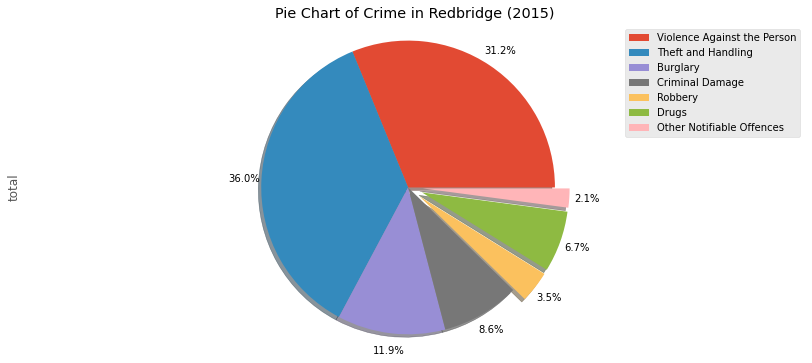

In [20]:
df_pie['total'].plot(kind='pie',
                       figsize=(14, 6),
                       autopct='%1.1f%%',
                       startangle=0,
                       shadow=True,
                       labels=None,
                       pctdistance=1.12,
                       explode=[0, 0, 0, 0, 0.1, 0.1, 0.1]
                      )

plt.title('Pie Chart of Crime in Redbridge (2015)')
plt.axis('equal') 
plt.legend(labels=df_pie.index, loc='upper right')

plt.show()

**Conclusion**
~~~
Jumlah crime yang paling banyak dilaporkan di wilayah Redbridge pada tahun 2015 adalah Theft and Handling. 
~~~

---
# E. Box Plot

**Pre-processing**

In [21]:
df_box = df_redb.transpose()
df_box

,1,2,3,4,5,6,7,8,9,10,11,12
Violence Against the Person,413,407,499,429,465,589,550,472,484,529,532,524
Theft and Handling,578,514,597,557,552,597,563,532,511,601,635,569
Burglary,251,252,202,177,155,166,147,130,167,168,205,225
Criminal Damage,122,115,157,132,118,140,156,113,129,153,142,150
Robbery,59,37,58,49,46,67,52,52,70,68,46,53
Drugs,127,106,100,87,98,110,99,103,123,100,99,120
Other Notifiable Offences,31,38,35,42,26,33,36,28,42,25,30,31


In [22]:
df_box.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,225.857143,209.857143,235.428571,210.428571,208.571429,243.142857,229.000000,204.285714,218.000000,234.857143,241.285714,238.857143
std,202.496443,188.123566,222.660322,201.996582,210.855288,243.014011,228.081857,207.141429,195.376559,231.595501,242.804252,219.948046
min,31.000000,37.000000,35.000000,42.000000,26.000000,33.000000,36.000000,28.000000,42.000000,25.000000,30.000000,31.000000
25%,90.500000,72.000000,79.000000,68.000000,72.000000,88.500000,75.500000,77.500000,96.500000,84.000000,72.500000,86.500000
50%,127.000000,115.000000,157.000000,132.000000,118.000000,140.000000,147.000000,113.000000,129.000000,153.000000,142.000000,150.000000
75%,332.000000,329.500000,350.500000,303.000000,310.000000,377.500000,353.000000,301.000000,325.500000,348.500000,368.500000,374.500000
max,578.000000,514.000000,597.000000,557.000000,552.000000,597.000000,563.000000,532.000000,511.000000,601.000000,635.000000,569.000000


**Create Visualization**

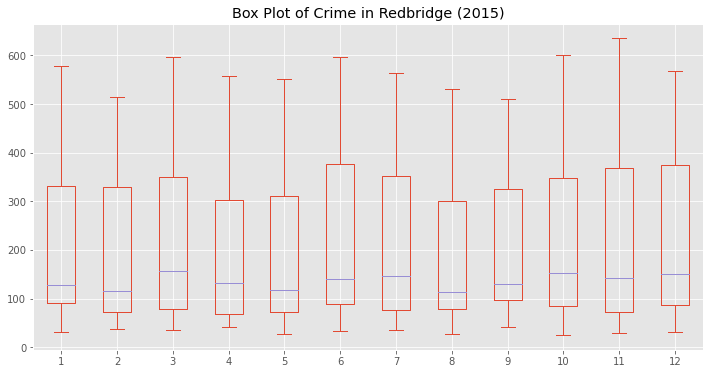

In [23]:
df_box.plot(kind='box', figsize=(12, 6))

plt.title('Box Plot of Crime in Redbridge (2015)')

plt.show()

In [24]:
list_outlr = []

for i in range(1, 13):
    q1 = np.percentile(df_box[i], 25)
    q3 = np.percentile(df_box[i], 75)
    iqr = q3 - q1
    outlr = q3 + (1.5 * iqr)
    for j in range(0, 7):
        if df_box[i].unique()[j] > outlr:
            list_outlr.append(i)

list_outlr

[]

**Conclusion**
~~~
Pada Plot di atas tidak terdapat outliers pada data setiap bulannya.
~~~

---
# F. Scatter Plot

**Pre-processing**

In [25]:
df_scatt = df_redb[['Burglary']]
df_scatt['month'] = df_scatt.index.values
df_scatt.reset_index()
df_scatt

C:\Users\death\AppData\Local\Temp\ipykernel_11488\982297392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scatt['month'] = df_scatt.index.values


,Burglary,month
1,251,1
2,252,2
3,202,3
4,177,4
5,155,5
6,166,6
7,147,7
8,130,8
9,167,9
10,168,10


**Create Visualization**

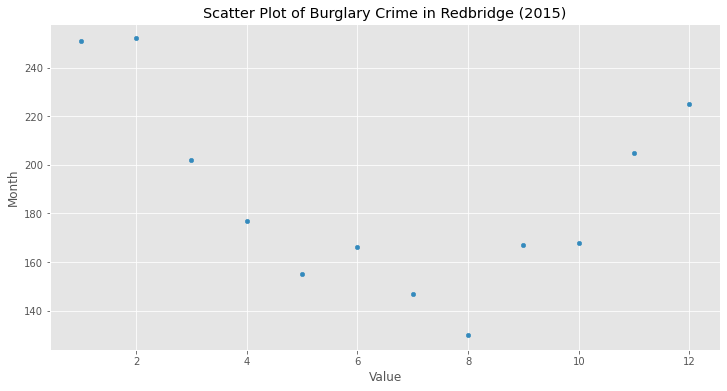

In [26]:
df_scatt.plot(kind='scatter',
             x='month',
             y='Burglary',
             figsize=(12, 6)
            )

plt.title('Scatter Plot of Burglary Crime in Redbridge (2015)')
plt.ylabel('Month')
plt.xlabel('Value')

plt.show()

**Conclusion**
```
Pada plot di atas jumlah crime Burglary di Redbridge (2015) pada bulan ke-2 sampai ke-5 mengalami penurunan dan ketika bulan ke-6 mengalami kenaikan namun akhirnya jumlahnya turun kembali sampai bulan ke-8. Setelah bulan ke-9 dan seterusnya jumlahnya terus meningkat.
```

---
# G. Word Clouds

In [27]:
from wordcloud import WordCloud

**Pre-processing**

In [28]:
df_wordcl = df_pie
df_wordcl

,total
Violence Against the Person,5893
Theft and Handling,6806
Burglary,2245
Criminal Damage,1627
Robbery,657
Drugs,1272
Other Notifiable Offences,397


In [29]:
df_wordcl.index.values

array(['Violence Against the Person', 'Theft and Handling', 'Burglary',
       'Criminal Damage', 'Robbery', 'Drugs', 'Other Notifiable Offences'],
      dtype=object)

In [30]:
total_crime = df_wordcl['total'].sum()
total_crime

18897

In [31]:
max_words = 60
word_string = ''

for i in df_wordcl.index.values:
    repeat_num_times = int(df_wordcl.loc[i, 'total'] / float(total_crime) * max_words)
#     word_string = word_string + ((i.replace(' ', '_') + ' ') * repeat_num_times)
    word_string = word_string + ((i.replace(' ', '-') + ' ') * repeat_num_times)

word_string

'Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Violence-Against-the-Person Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Theft-and-Handling Burglary Burglary Burglary Burglary Burglary Burglary Burglary Criminal-Damage Criminal-Damage C

**Create Visualization**

In [32]:
wordcloud = WordCloud(background_color='white',
                      width=1280,
                      height=760,
                      max_font_size=200
                     ).generate(word_string)

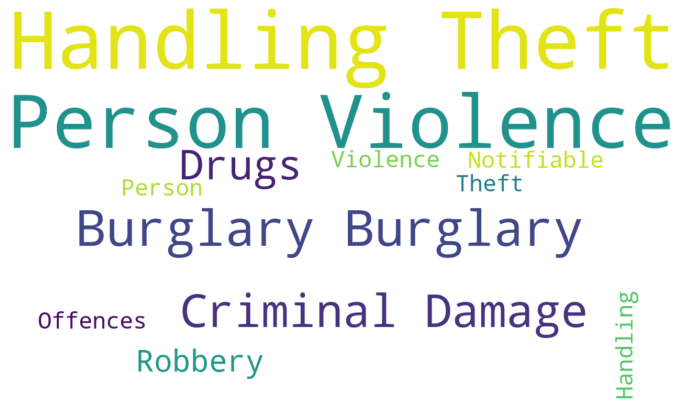

In [33]:
# fig = plt.figure()
# fig.set_figwidth(12)
# fig.set_figheight(14)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Conclusion**
~~~
Berdasarkan word cloud di atas, crime yang sering terjadi diantaranya Handling Theft (Theft and Handling), Person Violence (Violence Against the Person) dan Burglary.
~~~

...